<a href="https://colab.research.google.com/github/valeriorichi/QQQ/blob/main/Lviv_Python_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Отримання даних

In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
response = requests.get("https://uadata.net/work-positions/cities.json?o=Львів")
data_json = response.json()

Створення DataFrame

In [ ]:
df = pd.DataFrame(data_json["data"])

In [ ]:
df.head()

,at,val
0,2022-05-23,1759
1,2022-05-24,1763
2,2022-05-25,1790
3,2022-05-26,1806
4,2022-05-27,1833


In [ ]:
df.shape

(387, 2)

In [ ]:
df.columns

Index(['at', 'val'], dtype='object')

In [ ]:
df.dtypes

at     object
val     int64
dtype: object

Підготовка данних

In [ ]:
df["at"] = pd.to_datetime(df['at'])

In [ ]:
df.dtypes

at     datetime64[ns]
val             int64
dtype: object

In [ ]:
df = df.rename(columns = {"at" : "Дата", "val" : "Вакансії"})

In [ ]:
df.head()

,Дата,Вакансії
0,2022-05-23,1759
1,2022-05-24,1763
2,2022-05-25,1790
3,2022-05-26,1806
4,2022-05-27,1833


In [ ]:
df.set_index("Дата", inplace = True)

Побудова графіків

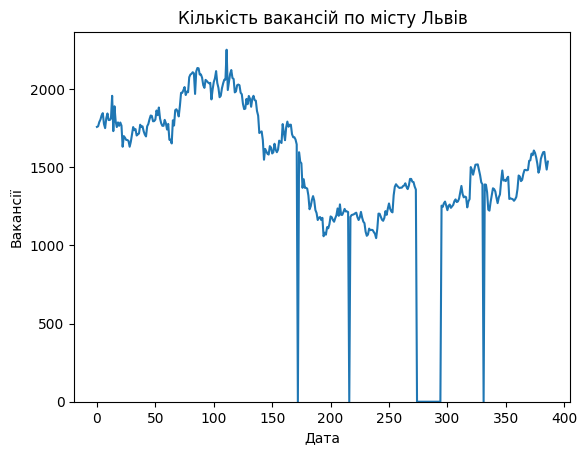

In [ ]:
df["Вакансії"].plot()
plt.title("Кількість вакансій по місту Львів")
plt.xlabel("Дата")
plt.ylabel("Вакансії")
plt.ylim(bottom = 0)
plt.show()

In [ ]:
df["Вакансії"] = df["Вакансії"].replace(0,np.nan)
df["Вакансії"] = df["Вакансії"].interpolate()

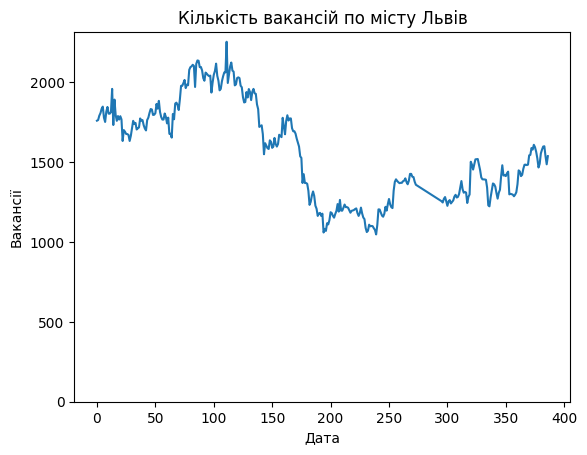

In [ ]:
df["Вакансії"].plot()
plt.title("Кількість вакансій по місту Львів")
plt.xlabel("Дата")
plt.ylabel("Вакансії")
plt.ylim(bottom = 0)
plt.show()

In [ ]:
df["rolling.mean"] = df["Вакансії"].rolling(window = 7).mean()

In [ ]:
df

,Дата,Вакансії,rolling.mean
0,2022-05-23,1759.0,NaN
1,2022-05-24,1763.0,NaN
2,2022-05-25,1790.0,NaN
3,2022-05-26,1806.0,NaN
4,2022-05-27,1833.0,NaN
...,...,...,...
382,2023-06-09,1597.0,1538.714286
383,2023-06-10,1599.0,1543.714286
384,2023-06-11,1536.0,1545.571429
385,2023-06-12,1486.0,1548.428571


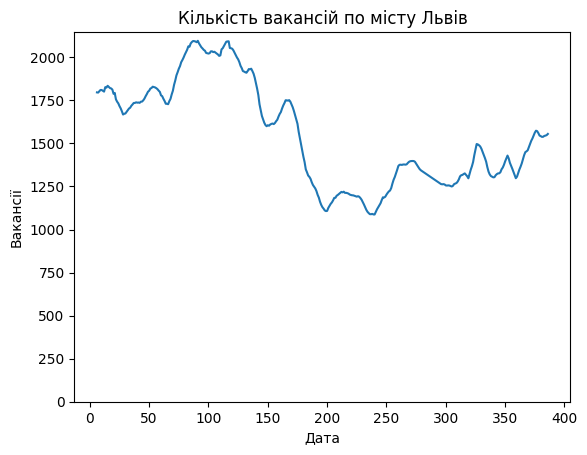

In [ ]:
df["rolling.mean"].plot()
plt.title("Кількість вакансій по місту Львів")
plt.xlabel("Дата")
plt.ylabel("Вакансії")
plt.ylim(bottom = 0)
plt.show()

In [ ]:
df.describe()

,Вакансії,rolling.mean
count,387.000000,381.000000
mean,1550.430233,1548.665354
std,301.486370,299.752824
min,1047.000000,1087.428571
25%,1287.886364,1298.142857
50%,1502.000000,1491.857143
75%,1789.000000,1796.571429
max,2253.000000,2096.142857
